<a href="https://colab.research.google.com/github/vishal8218/Python_Project/blob/main/Spotify_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the dataset

In [ ]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
data=pd.read_csv('Songs.csv')
data.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


Display Size of dataset

In [ ]:
print(data.shape)

(586672, 20)


In [ ]:
print(data.size)

11733440


Check the Detail information of the dataframe 

In [ ]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [ ]:
print(sorted(data))

['acousticness', 'artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'id', 'id_artists', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo', 'time_signature', 'valence']


Describe entire dataset

In [ ]:
data.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


Delete A Column 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



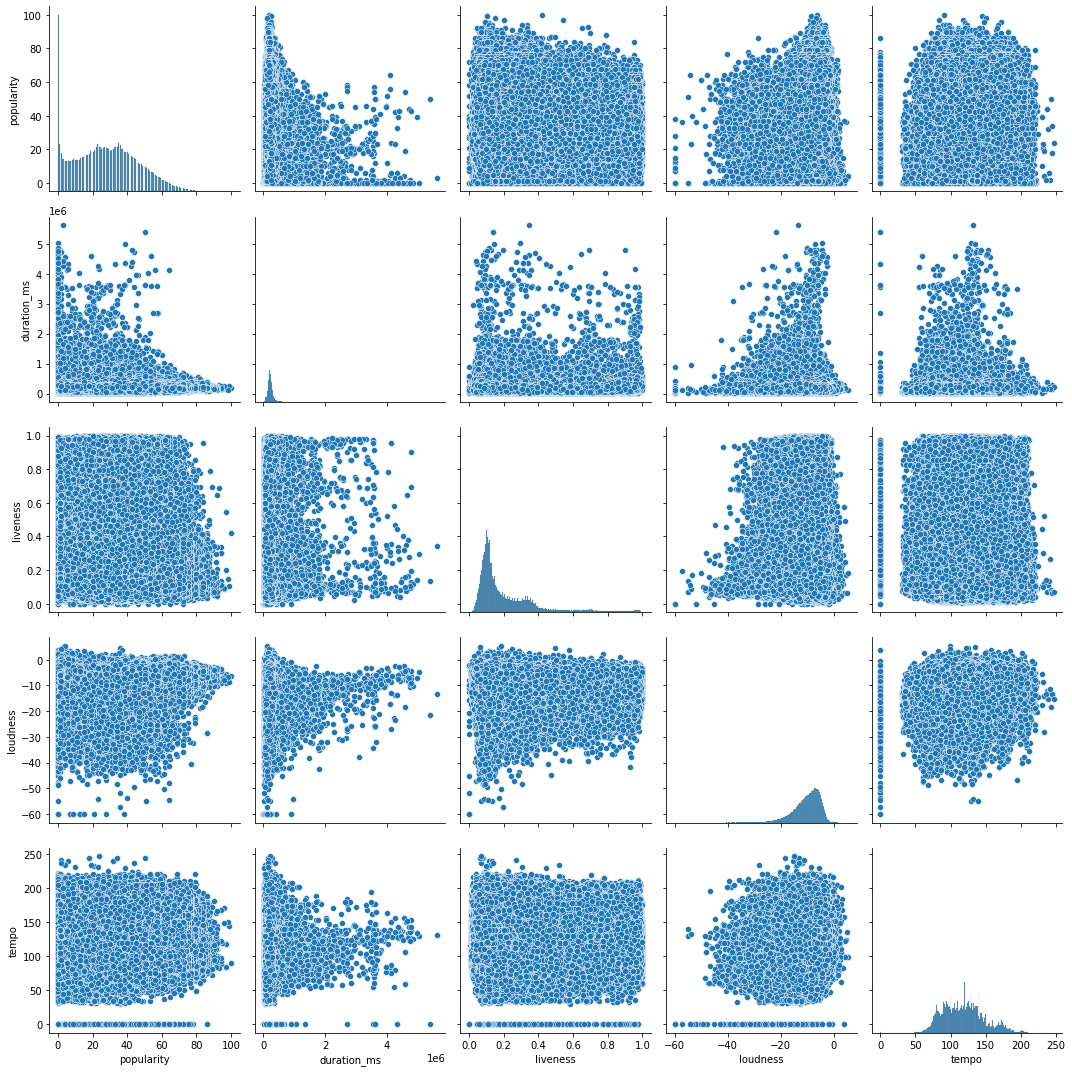

In [ ]:
data=data.drop(columns=['id','explicit','id_artists','release_date','time_signature','artists'],axis=1)
cols=['popularity','duration_ms','liveness','loudness','tempo']
sns.pairplot(data[cols], size=3)
plt.tight_layout()
plt.show()



Check the Null values or Missing

In [ ]:
data['popularity']=pd.qcut(data['popularity'],q=[0,.2,.4,.6,.8,1],labels=False)
print(data['popularity'])
data['key']=pd.qcut(data['key'],q=2,labels=[0,1])

0         0
1         0
2         0
3         0
4         0
         ..
586667    4
586668    4
586669    4
586670    4
586671    3
Name: popularity, Length: 586672, dtype: int64


Check NULL or missing value After drop few columns

In [ ]:
print(data.isnull().sum())

name                71
popularity           0
duration_ms          0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
dtype: int64


 ! Encoding 

In [ ]:
ordi=preprocessing.OrdinalEncoder()
ordi.fit(data[['name']])
data['name']=ordi.transform(data[['name']])

## Handle missing value in name column
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy='mean')
si.fit(data[['name']])
data['name']=si.transform(data[['name']])
data.head()

,name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,62328.0,0,126903,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851
1,60987.0,0,98200,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009
2,377628.0,0,181640,0.434,0.1770,0,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418
3,106033.0,0,176907,0.321,0.0946,1,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980
4,198883.0,0,163080,0.402,0.1580,0,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220


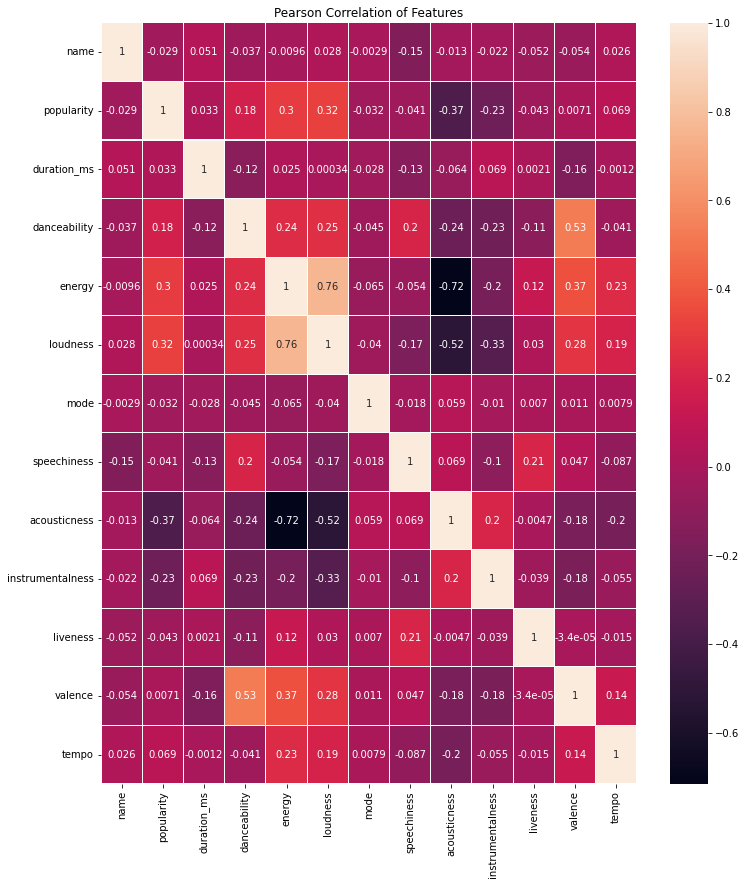

In [ ]:

data.corr()
colormap = plt.cm.RdBu
plt.figure(figsize=(12,14))
plt.title('Pearson Correlation of Features')
sns.heatmap( data.corr(),linewidths=0.1,vmax=1.0,annot=True)

Split the dataset

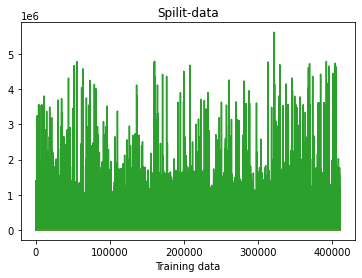

In [ ]:
x=data.iloc[:,:-1].values
y=data['popularity'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
plt.plot(x_train)
plt.xlabel('Training data')
plt.title('Spilit-data')
plt.show()

Normalization process

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
stdsc = StandardScaler()
stdsc.fit(x_train)
x_train_std = stdsc.transform(x_train)
x_test_std = stdsc.transform(x_test)

Model and Training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
knn_model=KNeighborsClassifier()
dc_model=DecisionTreeClassifier()
knn_model.fit(x_train_std,y_train)
dc_model.fit(x_train_std,y_train)
lin_reg=LinearRegression()
lin_reg.fit(x_train_std,y_train)
# Accuracy calculate

from sklearn.metrics import  accuracy_score
acc_model_knn=knn_model.score(x_test_std,y_test)
acc_model_dc=dc_model.score(x_test_std,y_test)
acc_model_lin=lin_reg.score(x_test_std,y_test)

#print Accuracy

print(acc_model_knn)
print(acc_model_dc)
print(acc_model_lin)


0.9529096260269769
1.0
1.0


In [ ]:

import plotly.express as px

fig=px.bar(x=['KNN_Model_Accuracy','Decision_Tree_Accuracy','Linear_Regression'],y=[acc_model_knn,acc_model_dc,acc_model_lin],labels={'x':'Models','y':'Accuracy'},title='Model Accuracy'

           )
fig.show()


Confusion_Matrix

In [ ]:
from sklearn.metrics import  confusion_matrix
y_pred=knn_model.predict(x_test_std)
y_pred_dc=dc_model.predict(x_test_std)
print("Confusion_ matrix of KNN")
print(confusion_matrix(y_pred, y_test))


Confusion_ matrix of KNN
[[35259  1793    44     1     3]
 [ 1199 33461  1432    27     1]
 [    9   647 34462  1381    30]
 [    0     2   404 31859   903]
 [    0     0     6   406 32673]]


In [ ]:
print("Confusion_matrix of Decision_Tree")
print(confusion_matrix(y_pred_dc, y_test))


Classification -report

In [ ]:
#Dececison Tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("- - - Decision_Tree - - -\n")
print(classification_report(y_pred_dc,y_test))

# KNN

print("\n - - - KNN - - -\n")
print(classification_report(y_pred,y_test))



- - - Decision_Tree - - -

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36467
           1       1.00      1.00      1.00     35903
           2       1.00      1.00      1.00     36348
           3       1.00      1.00      1.00     33674
           4       1.00      1.00      1.00     33610

    accuracy                           1.00    176002
   macro avg       1.00      1.00      1.00    176002
weighted avg       1.00      1.00      1.00    176002


 - - - KNN - - -

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     37100
           1       0.93      0.93      0.93     36120
           2       0.95      0.94      0.95     36529
           3       0.95      0.96      0.95     33168
           4       0.97      0.99      0.98     33085

    accuracy                           0.95    176002
   macro avg       0.95      0.95      0.95    176002
weighted avg       0.95      0.